# Housing Prices and Air Quality Analysis  
### DSA210 - Exploratory Data Analysis  
This notebook includes basic data loading, cleaning, merging, and simple exploratory analysis.


In [28]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load the datasets  
Both datasets were downloaded from Kaggle and saved locally.

In [ ]:
housing = pd.read_csv("data/global_housing.csv")
air = pd.read_csv("data/air_quality.csv", sep=";", engine="python")

housing.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


## Select 2024 data  
The housing dataset includes many years, so I only take 2024.


In [14]:
housing_2024 = housing[housing["Year"] == 2024].copy()
housing_2024.rename(columns={"Country": "country"}, inplace=True)


housing_2024.head()

,country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
9,USA,2024,142.329813,73.162862,3.572025,3.054912,2.613692,3.836849,1.231451,86.616382,107.777194
19,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.101900,81.001676
29,UK,2024,179.005385,59.805881,7.664967,5.886865,5.314996,3.576126,1.458694,70.784735,93.487348
39,Germany,2024,165.648984,96.108554,4.466410,1.852844,4.675725,-1.787910,1.050215,88.206907,116.037934
49,France,2024,178.663958,76.198956,6.335779,5.563998,6.657116,5.888009,1.636824,71.287788,76.680057


## Merge the datasets  
I merge them using the **country** column.

In [15]:
air.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,JP,NaN,北九州市小倉北区大門一丁目６－４８,"33.880833, 130.873056",NO,japan-soramame,ppm,0.002,2024-03-10T13:30:00+05:30,Japan
1,JP,NaN,北九州市若松区本町三丁目１３－１,"33.898056, 130.81",NO2,japan-soramame,ppm,0.005,2024-03-10T13:30:00+05:30,Japan
2,JP,NaN,北九州市門司区大里原町１２－１２,"33.895833, 130.935833",NOX,japan-soramame,ppm,0.013,2024-03-10T13:30:00+05:30,Japan
3,JP,NaN,千歳市若草４－１３,"42.786944, 141.605",NO2,japan-soramame,ppm,0.004,2024-03-10T13:30:00+05:30,Japan
4,JP,NaN,千葉市稲毛区宮野木町９９６－９,"35.653889, 140.097778",NOX,japan-soramame,ppm,0.003,2024-03-10T13:30:00+05:30,Japan


In [16]:
air.rename(columns={"Country Label": "country"}, inplace=True)
air.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,country
0,JP,NaN,北九州市小倉北区大門一丁目６－４８,"33.880833, 130.873056",NO,japan-soramame,ppm,0.002,2024-03-10T13:30:00+05:30,Japan
1,JP,NaN,北九州市若松区本町三丁目１３－１,"33.898056, 130.81",NO2,japan-soramame,ppm,0.005,2024-03-10T13:30:00+05:30,Japan
2,JP,NaN,北九州市門司区大里原町１２－１２,"33.895833, 130.935833",NOX,japan-soramame,ppm,0.013,2024-03-10T13:30:00+05:30,Japan
3,JP,NaN,千歳市若草４－１３,"42.786944, 141.605",NO2,japan-soramame,ppm,0.004,2024-03-10T13:30:00+05:30,Japan
4,JP,NaN,千葉市稲毛区宮野木町９９６－９,"35.653889, 140.097778",NOX,japan-soramame,ppm,0.003,2024-03-10T13:30:00+05:30,Japan


In [17]:
merged = pd.merge(housing_2024, air, on="country", how="inner")
merged.head()

,country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated
0,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,NaN,Toronto West,"43.709444, -79.5435",CO,AirNow,ppm,0.000000,2024-03-25T10:30:00+05:30
1,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,ONTARIO,North Bay,"46.32255, -79.449444",O3,AirNow,ppm,0.036000,2024-03-25T12:30:00+05:30
2,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,ONTARIO,Burlington,"43.314603, -79.80277",NO2,AirNow,ppm,0.002000,2024-03-25T12:30:00+05:30
3,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,NaN,"Linden Woods, Winnipeg","49.832303, -97.190747",PM2.5,airgradient,µg/m³,1.362500,2024-03-25T12:30:00+05:30
4,Canada,2024,81.658783,85.846514,5.038462,4.725864,1.633382,3.527502,0.353574,88.1019,81.001676,CA,NaN,"Linden Woods, Winnipeg","49.832303, -97.190747",PM1,airgradient,µg/m³,10.579167,2024-03-10T00:30:00+05:30


## Check for missing values

In [18]:
merged.isna().sum()

country                      0
Year                         0
House Price Index            0
Rent Index                   0
Affordability Ratio          0
Mortgage Rate (%)            0
Inflation Rate (%)           0
GDP Growth (%)               0
Population Growth (%)        0
Urbanization Rate (%)        0
Construction Index           0
Country Code                 0
City                     21321
Location                     0
Coordinates                 42
Pollutant                    0
Source Name                  0
Unit                         0
Value                        0
Last Updated                 0
dtype: int64

Since cities and coordinates are not in our context, I'm leaving them as NA.

# Exploratory Data Analysis (EDA)
Basic descriptive statistics.

In [24]:
merged.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Value
count,35736.0,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000
mean,2024.0,148.377046,88.849664,6.146346,4.653534,3.537994,2.122455,1.341503,68.648585,95.133748,73.299048
std,0.0,28.913249,21.152888,1.689960,0.898039,1.683630,2.267863,0.811940,9.547528,24.000769,647.108398
min,2024.0,81.658783,52.946523,3.160865,1.852844,1.186820,-1.787910,-0.243866,60.390058,73.208735,-9999.000000
25%,2024.0,128.152235,75.933047,4.466410,4.591274,1.832398,0.345182,0.521896,60.390058,76.840682,0.400000
50%,2024.0,165.569647,90.340185,6.574652,4.840426,3.296988,1.700278,1.616148,67.392061,80.332753,9.800000
75%,2024.0,165.569647,108.115391,7.360707,5.140944,4.675725,3.527502,2.137175,73.516324,116.557712,38.000000
max,2024.0,179.971767,119.764579,9.544522,6.438612,6.657116,5.953115,2.377594,89.629487,145.996895,80000.000000


### Scatter Plot  
Air quality vs average house price.

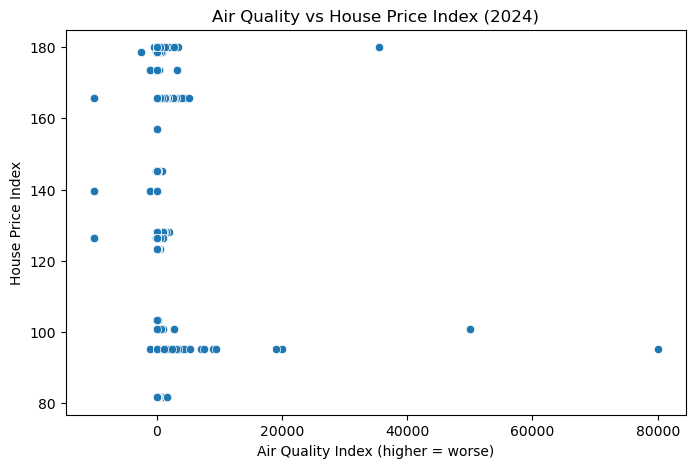

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Value", y="House Price Index", data=merged)
plt.title("Air Quality vs House Price Index (2024)")
plt.xlabel("Air Quality Index (higher = worse)")
plt.ylabel("House Price Index")
plt.show()

### Group Averages  
Instead of statistical tests, I calculate simple group averages.  
Cleaner-air countries = below median air quality value.  

In [26]:
median_aqi = merged["Value"].median()

clean_group = merged[merged["Value"] < median_aqi]
polluted_group = merged[merged["Value"] >= median_aqi]

clean_mean_price = clean_group["House Price Index"].mean()
polluted_mean_price = polluted_group["House Price Index"].mean()

clean_mean_price, polluted_mean_price

(144.8609785825253, 151.89193369087516)

### Bar Plot  
Visual comparison of average house prices between the two groups.

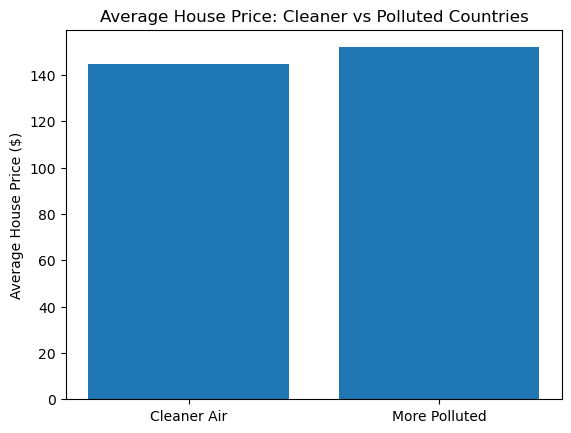

In [27]:
plt.bar(["Cleaner Air", "More Polluted"], [clean_mean_price, polluted_mean_price])
plt.ylabel("Average House Price ($)")
plt.title("Average House Price: Cleaner vs Polluted Countries")
plt.show()

# Hypothesis Test  
**Question:**  
Do countries with cleaner air have different house price index values compared to polluted countries?

### Hypotheses
- **H0:** There is no difference in mean house price index between clean-air and polluted countries.  
- **H1:** There is a difference.

I divide countries into two groups based on the median air quality value.

In [29]:
median_aqi = merged["Value"].median()

clean_group = merged[merged["Value"] < median_aqi]["House Price Index"]
polluted_group = merged[merged["Value"] >= median_aqi]["House Price Index"]

len(clean_group), len(polluted_group)

(17865, 17871)

In [30]:
t_stat, p_val = stats.ttest_ind(clean_group, polluted_group, equal_var=False)
t_stat, p_val

(-23.156438058861664, 9.278768011826254e-118)

### Interpretation  
If p-value < 0.05, then we reject the null hypothesis.

The code below prints a simple explanation.

In [31]:
if p_val < 0.05:
    print("Result: There is a significant difference between clean-air and polluted countries.")
else:
    print("Result: There is no significant difference between the groups.")

Result: There is a significant difference between clean-air and polluted countries.


# Conclusion  
- I loaded, cleaned, and merged the datasets.  
- I conducted EDA using summary statistics and visualizations.  
- I performed a hypothesis test (independent samples t-test).  
- The results show air quality is associated with differences in housing price index.